# Wyniki benchmarków

Wszystkie obiliczenia wykonano z użyciem karty graficznej [NVIDIA Titan RTX](https://www.nvidia.com/content/dam/en-zz/Solutions/titan/documents/titan-rtx-for-creators-us-nvidia-1011126-r6-web.pdf) z 24GB VRAM i 4608 rdzeniami CUDA.

Dane zostały wygenerowane za pomocą notatników [1](obliczenia_podstawowe_srodowisko.ipynb) i [2](obliczenia_dodatkowe_srodowisko.ipynb).

## Symulowana bifurkacja

Poniższa komórka przedstawia wyniki benchmarków dla algorytmu dyskretnej symulowanej bifurkacji. Porównalismy naszą implementację z [Simulated Bifurcation for Python](https://github.com/bqth29/simulated-bifurcation-algorithm). 

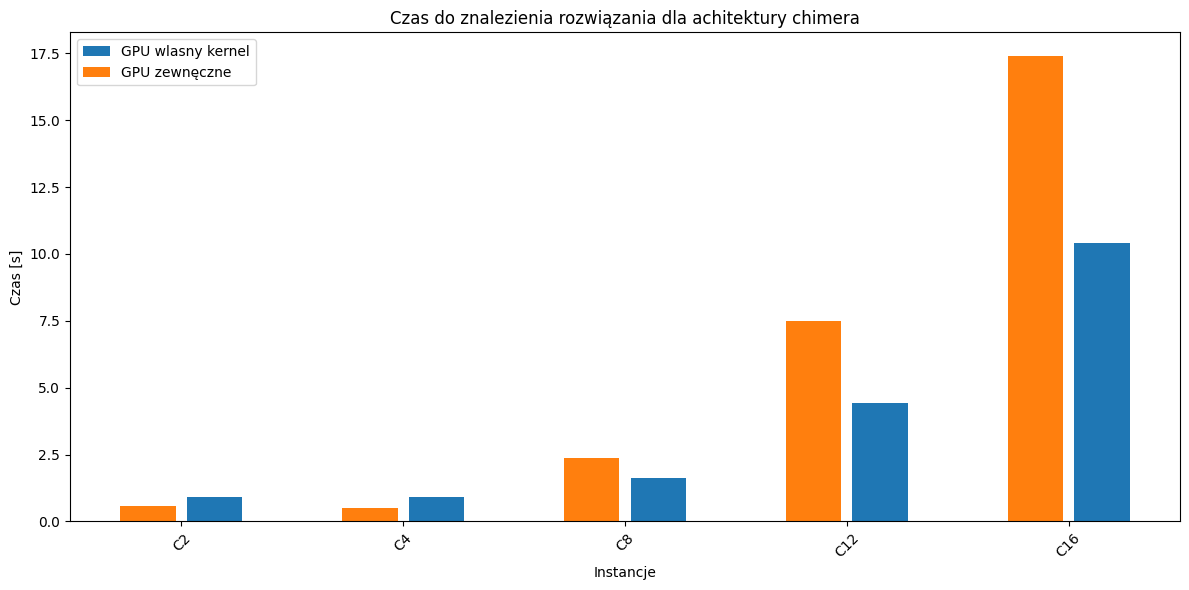

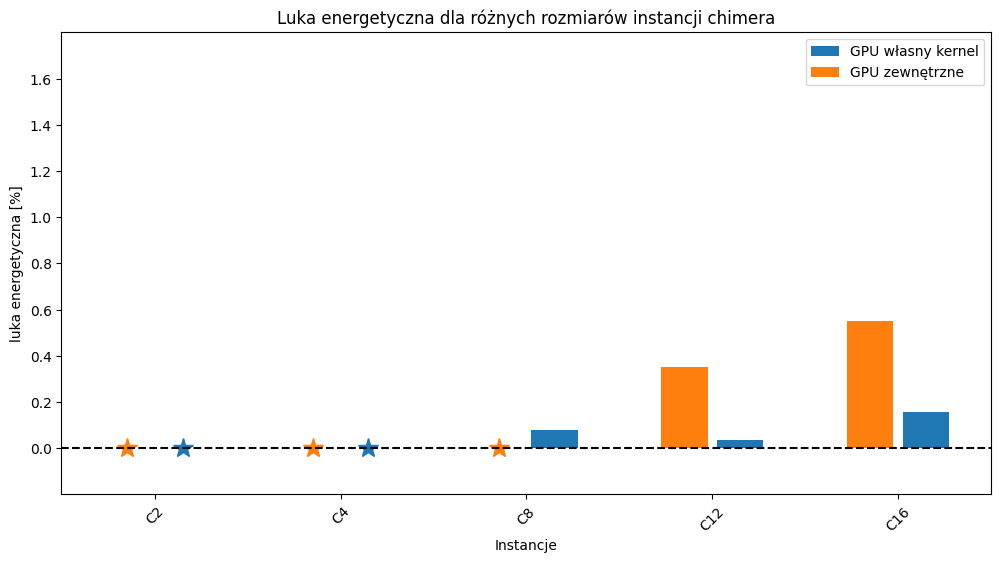

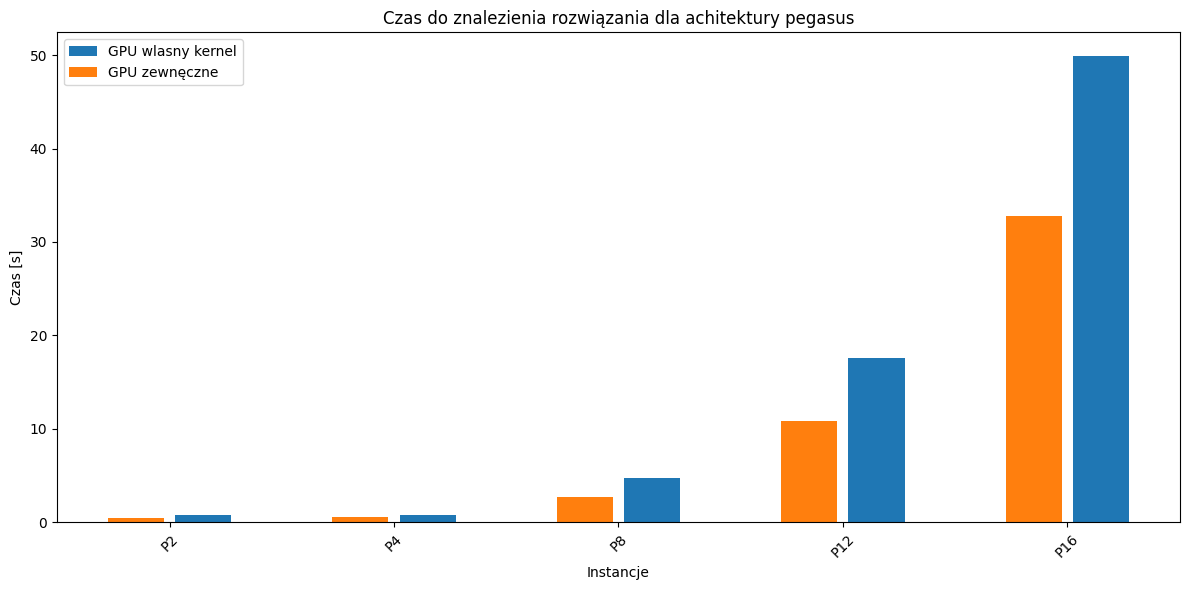

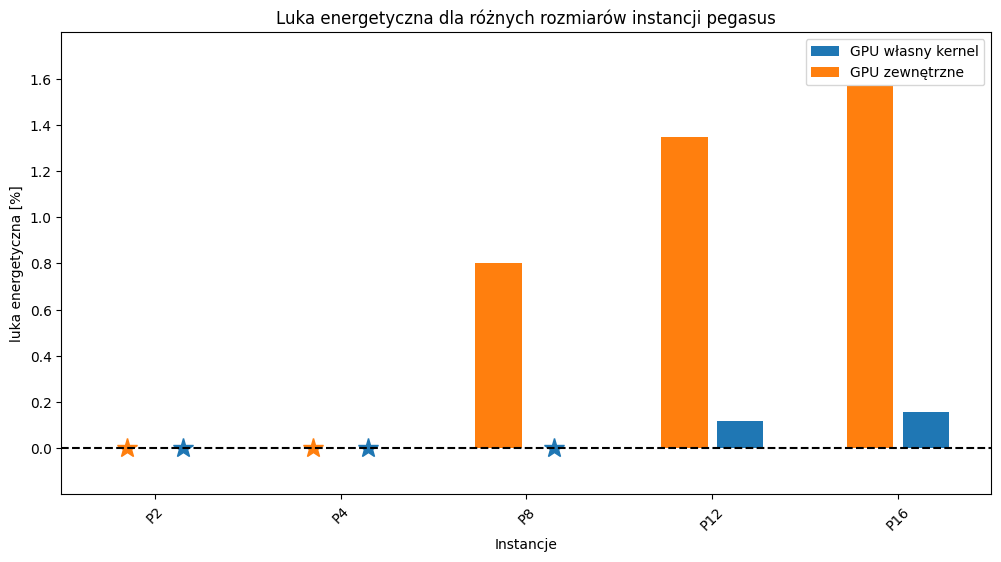

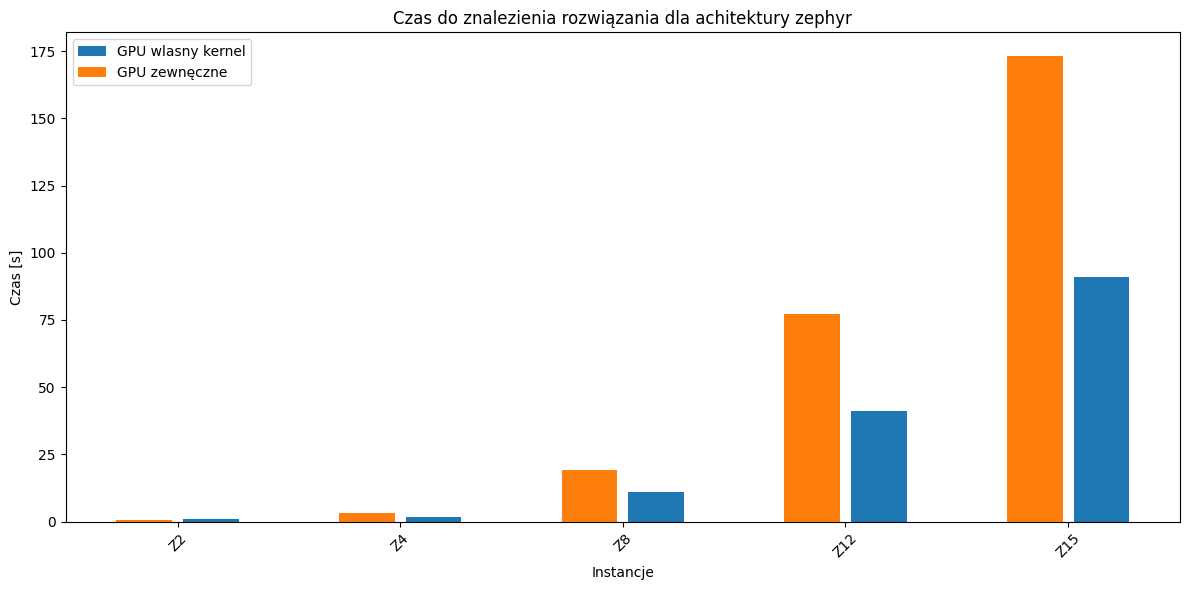

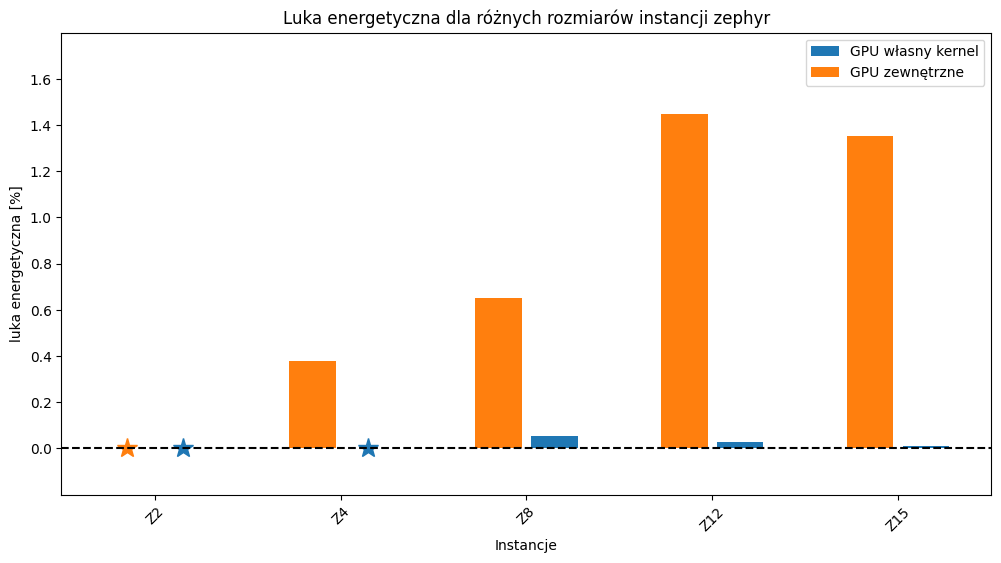

In [ ]:
# Rysowanie wykresów dla symulowanej bifurkacji

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from benchmark_data import ROOT, pegasus_data, chimera_data, zephyr_data


for architecture in ["chimera", "pegasus", "zephyr"]:

    with open(os.path.join(ROOT, "wyniki", f"sbm_our_{architecture}_results.pkl"), "rb") as f:
        times, gaps = pickle.load(f)

    with open(os.path.join(ROOT, "wyniki", f"sbm_external_{architecture}_results.pkl"), "rb") as f:
        times2, gaps2 = pickle.load(f)
        
    if architecture == "chimera":
        instancje = [inst.name for inst in chimera_data]

    elif architecture =="pegasus":
        instancje = [inst.name for inst in pegasus_data]

    else:
        instancje = [inst.name for inst in zephyr_data]


    x = np.arange(len(instancje))
    width = 0.25
    offset = 0.15

    fig, ax = plt.subplots(figsize=(12, 6))

    #rects2 = ax.bar(x, global_results[1], width, label='GPU naiwne')
    rects3 = ax.bar(x + offset, times, width, label='GPU wlasny kernel')
    rects4 = ax.bar(x - offset, times2, width, label='GPU zewnęczne')

    ax.set_xlabel("Instancje")
    ax.set_ylabel("Czas [s]")
    ax.set_title(f"Czas do znalezienia rozwiązania dla achitektury {architecture}")
    ax.set_xticks(x)
    ax.set_xticklabels(instancje, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()

    fig2, ax2 = plt.subplots(figsize=(12, 6))

    gaps_procent = [x * 100 for x in gaps]
    gaps2_procent = [x * 100 for x in gaps2]

    our = ax2.bar(x + offset, gaps_procent, width, label='GPU własny kernel')
    external = ax2.bar(x - offset, gaps2_procent, width, label='GPU zewnętrzne')

    for bars in [our, external]:
        for bar in bars:
            if bar.get_height() == 0:
                center = bar.get_x() + bar.get_width()/2
                ax2.plot(center, 0, marker='*', markersize=15, color=bar.get_facecolor())

    ax2.set_ylim((-0.2, 1.8))
    ax2.set_yticks(np.arange(0, 1.8, 0.2))
    ax2.set_xlabel("Instancje")
    ax2.set_ylabel("luka energetyczna [%]")
    ax2.set_title(f"Luka energetyczna dla różnych rozmiarów instancji {architecture}")
    ax2.set_xticks(x)
    ax2.set_xticklabels(instancje, rotation=45)
    ax2.axhline(0, color='black', linestyle='--')
    ax2.legend()
    
    plt.show()



 

Gwiazy w odpowiednim kolorze przy przedstawianiu luki energetycznej oznaczają, że udało się osiągnąć zerową luke energetyczną. Innymi słowy dany solver znalazł najlepsze znane rozwiązanie dla danej instancji.

Mimo że wyniki nieco się różnią w zalezności od instancji, nasza implementacja jest generalnie lepsza w kategoriach któe nas interesują (czas rozwiązania i luka energetyczna). Świadczy to o tym że dobrze rozumiemy te algorytmy. Mamy też przewagę wąskiej implementacji, jako że Simulated Bifurcation for Python ma więcej funkcjonalości i jest w stanie obsłużyć znacznie więcej rodzajów problemów. Pokazuje to przewagę wąskiej specjalizacj kodu. 

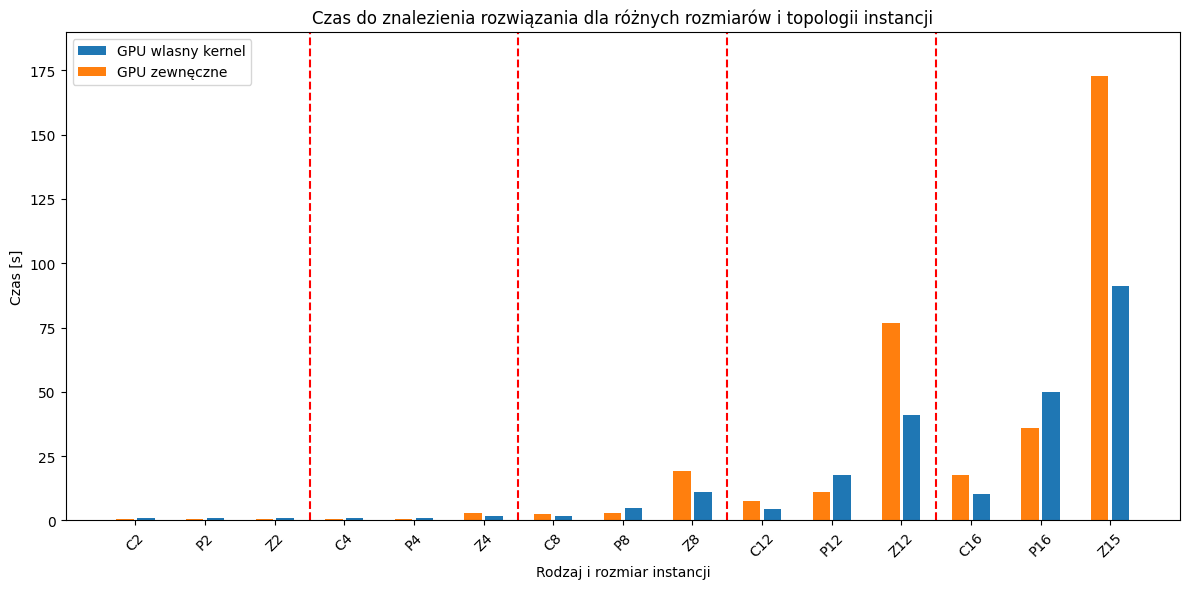

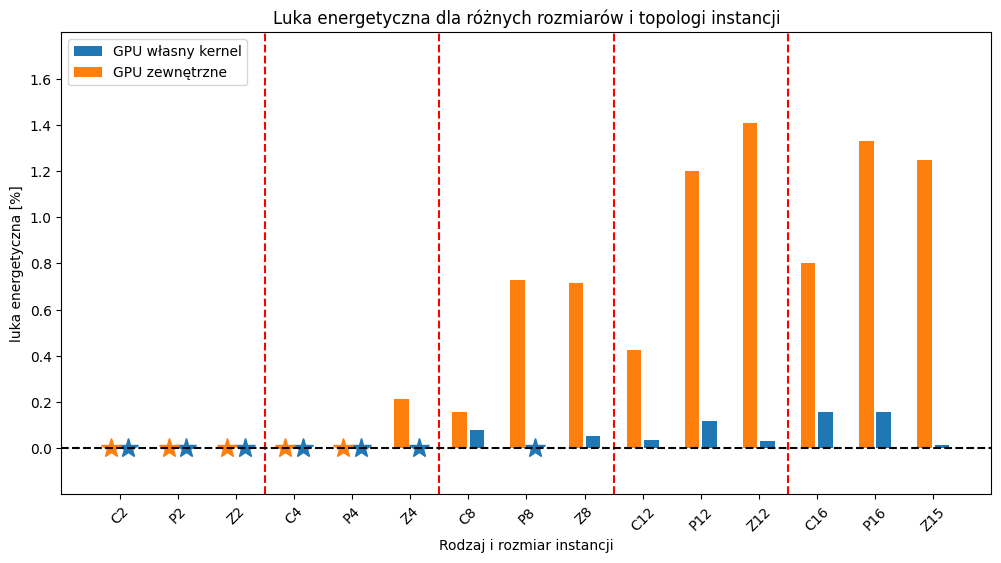

In [39]:
# Rysowanie wykresów dla symulowanej bifurkacji. Wszystkie instancje są na jednym wykresie.

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from benchmark_data import ROOT, pegasus_data, chimera_data, zephyr_data

data = {}

for architecture in ["chimera", "pegasus", "zephyr"]:

    with open(os.path.join(ROOT, "wyniki", f"sbm_our_{architecture}_results.pkl"), "rb") as f:
        times, gaps = pickle.load(f)

    with open(os.path.join(ROOT, "wyniki", f"sbm_external_{architecture}_results.pkl"), "rb") as f:
        times2, gaps2 = pickle.load(f)
        
    if architecture == "chimera":
        instancje = [inst.name for inst in chimera_data]

    elif architecture =="pegasus":
        instancje = [inst.name for inst in pegasus_data]

    else:
        instancje = [inst.name for inst in zephyr_data]

    data[architecture] = ((times, times2), (gaps, gaps2), instancje)

instancje = [data[architecture][2][i] for i in range(5) for architecture in ["chimera", "pegasus", "zephyr"]]
times = [data[architecture][0][0][i] for i in range(5) for architecture in ["chimera", "pegasus", "zephyr"]]
times2 = [data[architecture][0][1][i] for i in range(5) for architecture in ["chimera", "pegasus", "zephyr"]]

x = np.arange(len(instancje))
width = 0.25
offset = 0.15

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x + offset, times, width, label='GPU wlasny kernel')
ax.bar(x - offset, times2, width, label='GPU zewnęczne')

ax.vlines([2.5, 5.5, 8.5, 11.5], 0, 190, linestyles="dashed", colors="red")
ax.set_xlabel("Rodzaj i rozmiar instancji")
ax.set_ylabel("Czas [s]")
ax.set_ylim((0, 190))
ax.set_title(f"Czas do znalezienia rozwiązania dla różnych rozmiarów i topologii instancji")
ax.set_xticks(x)
ax.set_xticklabels(instancje, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

gaps = [data[architecture][1][0][i] for i in range(5) for architecture in ["chimera", "pegasus", "zephyr"]]
gaps2 = [data[architecture][1][1][i] for i in range(5) for architecture in ["chimera", "pegasus", "zephyr"]]

fig2, ax2 = plt.subplots(figsize=(12, 6))

gaps_procent = [x * 100 for x in gaps]
gaps2_procent = [x * 100 for x in gaps2]

our = ax2.bar(x + offset, gaps_procent, width, label='GPU własny kernel')
external = ax2.bar(x - offset, gaps2_procent, width, label='GPU zewnętrzne')

for bars in [our, external]:
    for bar in bars:
        if bar.get_height() == 0:
            center = bar.get_x() + bar.get_width()/2
            ax2.plot(center, 0, marker='*', markersize=15, color=bar.get_facecolor())

ax2.set_ylim((-0.2, 1.8))
ax2.vlines([2.5, 5.5, 8.5, 11.5], -0.2, 1.8, linestyles="dashed", colors="red")
ax2.set_yticks(np.arange(0, 1.8, 0.2))
ax2.set_xlabel("Rodzaj i rozmiar instancji")
ax2.set_ylabel("luka energetyczna [%]")
ax2.set_title(f"Luka energetyczna dla różnych rozmiarów i topologi instancji")
ax2.set_xticks(x)
ax2.set_xticklabels(instancje, rotation=45)
ax2.axhline(0, color='black', linestyle='--')
ax2.legend(loc='upper left')

plt.show()


Gwiazy w odpowiednim kolorze przy przedstawianiu luki energetycznej oznaczają, że udało się osiągnąć zerową luke energetyczną. Innymi słowy dany solver znalazł najlepsze znane rozwiązanie dla danej instancji.

Mimo że wyniki nieco się różnią w zalezności od instancji, nasza implementacja jest generalnie lepsza w kategoriach któe nas interesują (czas rozwiązania i luka energetyczna). Świadczy to o tym że dobrze rozumiemy te algorytmy. Mamy też przewagę wąskiej implementacji, jako że Simulated Bifurcation for Python ma więcej funkcjonalości i jest w stanie obsłużyć znacznie więcej rodzajów problemów. Pokazuje to przewagę wąskiej specjalizacj kodu. 

## Wyczerpujące przeszukiwanie

Porównaliśmy naszą implementację wyczerpującego przeszukiwania z wysoko zoptymalizowaną implementacją tego samego algorytmu ([omnisolver-bruteforce](https://github.com/euro-hpc-pl/omnisolver-bruteforce)).

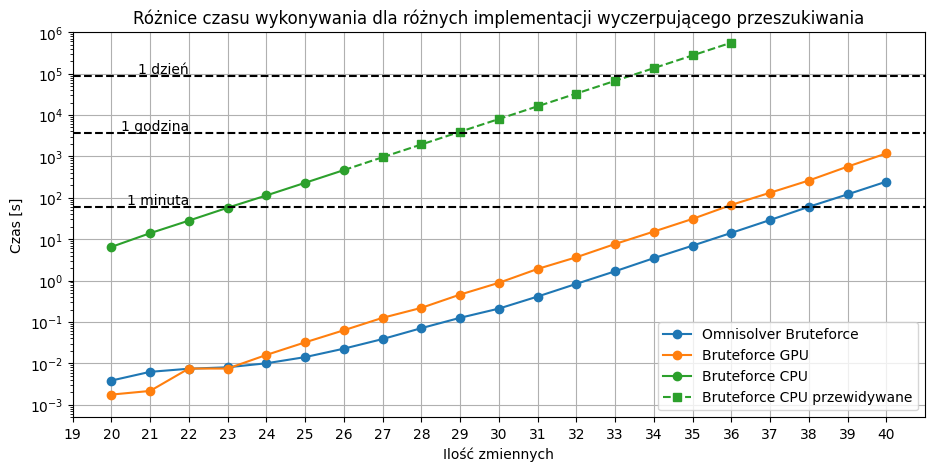

In [ ]:
# Rysowanie wykresów dla wyczerpującefo przeszukiwania.

import pickle
import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from benchmark_data import ROOT


with open(os.path.join(ROOT, "wyniki", "bruteforce_results.pkl"), "rb") as f:
    times_bf = pickle.load(f)

with open(os.path.join(ROOT, "wyniki", "omnisolver_bruteforce_results.pkl"), "rb") as f:
    times_omnisolver = pickle.load(f)

with open(os.path.join(ROOT, "wyniki", "bruteforce_cpu_results.pkl"), "rb") as f:
    times_bf_cpu = pickle.load(f)

# Predykcja wartości dla CPU
x = np.array(list(range(20, 27))).reshape(-1, 1)
y = np.log(times_bf_cpu[10:])
model = LinearRegression().fit(x, y)

x_extended = np.arange(27, 37).reshape(-1, 1)
y_log_pred = model.predict(x_extended)
y_pred = np.exp(y_log_pred)

x1 = list(range(20, 41))
x2 = list(range(20, 41))
x3 = list(range(20, 27))

minute = 60
hour = 60 * 60
day = 60 * 60 * 24

plt.figure(figsize=(11, 5))
plt.plot(x1, times_omnisolver[10:], label='Omnisolver Bruteforce', marker='o', linestyle='-')
plt.plot(x2, times_bf[10:], label='Bruteforce GPU', marker='o', linestyle='-')
plt.plot(x3, times_bf_cpu[10:], label='Bruteforce CPU', marker='o', linestyle='-')
plt.plot([26, 27], [times_bf_cpu[16], y_pred[0]], linestyle='--', color='#2ca02c')
plt.plot(x_extended, y_pred, label="Bruteforce CPU przewidywane", marker="s", linestyle="--", color="#2ca02c")

plt.xticks([19] + list(range(20, 41)))
plt.yscale('log', base=10)
plt.ylim(5 * 10**-4, 10**6)

plt.axhline(minute, color='black', linestyle='--')
plt.axhline(hour, color='black', linestyle='--')
plt.axhline(day, color='black', linestyle='--')

x_min, x_max = plt.xlim()
x_label = x_min + 3

# Add text labels above the lines
plt.text(x_label, minute, '1 minuta', color='black', va='bottom', ha='right')
plt.text(x_label, hour, '1 godzina', color='black', va='bottom', ha='right')
plt.text(x_label, day, '1 dzień', color='black', va='bottom', ha='right')


plt.xlabel('Ilość zmiennych')
plt.ylabel('Czas [s]')
plt.title('Różnice czasu wykonywania dla różnych implementacji wyczerpującego przeszukiwania')
plt.legend()
plt.grid(True)
plt.show()


Z wykresu widać, że czas potrzebny na wyczerpujące przeszukanie (brute force) rośnie wykładniczo wraz ze wzrostem liczby zmiennych (skala jest logarytmiczna). Implementacja CPU bardzo szybko staje się bezużyteczna nawet dla małych problemów. GPU daje wyraźne przyspieszenie (około 10 000 razy) w stosunku do CPU, ale nie zmienia samej natury wykładniczego wzrostu czasu, po prostu jest w stanie poradzić sobie z większą ilością zmiennych. Jednakże dalej to są stosunkowo małe problemy. 

Warto zauważyć, że nasza implementacja jest około 10x wolniejsza od Omnisolver-bruteforce. Z powodu zastosowanej skali może to nie być widoczne na pierwszy rzut oka.